In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Single variable function
def fourier_series(t, a0:int = 1, an:list = [1,2,3,4,5], bn:list = [1,2,3,4,5]):
    result = a0
    for n in range(1, len(an) + 1):
        result += an[n - 1] * np.cos(n * t) + bn[n - 1] * np.sin(n * t)
    return result

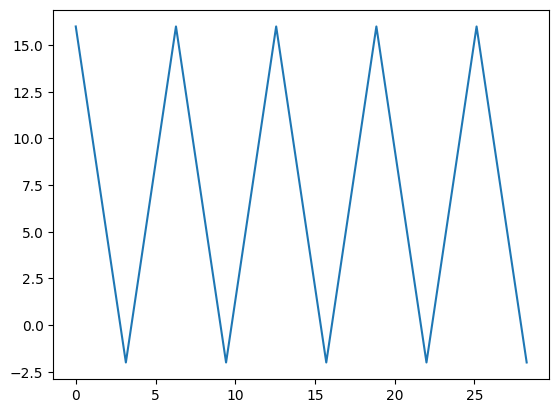

In [23]:
time_arr = np.arange(0, 10*math.pi, math.pi)
resulting_signal = fourier_series(time_arr)
plt.plot(time_arr, resulting_signal, label = "Fourier series signal")

In [24]:
def fourier_series_differential(t:int, h:float, a0:int = 1, an:list = [1,2,3,4,5], bn:list = [1,2,3,4,5]):
    return (fourier_series(t+h,a0,an,bn) - fourier_series(t-h,a0,an,bn))/2*h

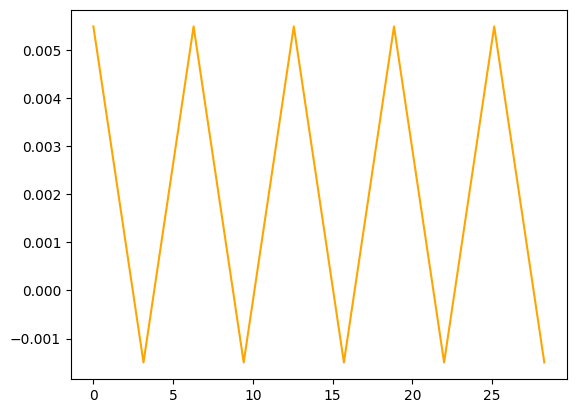

In [25]:
fourier_series_derivative =fourier_series_differential(time_arr, h=0.01)
plt.plot(time_arr, fourier_series_derivative, label = "Fourier series derivative", color='orange')

In [26]:
#Multi Variable function
def twovar_func(x, y):
    return x**2 * y**2 + 2*x*y
def twovar_func_differential_x(x, y, h=0.01):
    return (twovar_func(x + h, y) - twovar_func(x - h, y)) / (2 * h)
twovar_func_differential_x(np.array([1,2,3]), np.array([1,2,3]))

array([ 4., 20., 60.])

In [27]:
from utils.engine import Value

a = Value(2.0, label="a")
b = Value(3.0, label="b")
c = a + b; c.label = "c"
d = 2*b; d.label = "d"
e = 3*a; e.label = "e"
f = c*d; f.label = "f"
g = f + e; g.label = "g"

def verification_func(h:float = 0.01):
    a = Value(2.0)
    b = Value(3.0)
    c = a + b
    d = 2*b
    e = 3*a
    f = c*d
    res1 = f + e

    a = Value(2.0)
    b = Value(3.0)+h
    c = a + b
    d = 2*b
    e = 3*a
    f = c*d
    res2 = f + e
    return (res2.data - res1.data) / h
print(verification_func())

16.019999999999612


In [28]:
x = Value(1.0, label = "x")
a0= Value(1.5, label = "a0")

a1 = Value(1,label='a1')
sin_x = x.sin(); sin_x.label = "sin(x)"
t1 = a1*sin_x; t1.label = "t1"

a2 = Value(2,label='a2')
cos_x = x.cos(); cos_x.label = "cos(x)"
t2 = a2*cos_x; t2.label = "t2"

a0_add_t1 = a0 + t1; a0_add_t1.label = "a0 + t1"
f_series = a0_add_t1 + t2; f_series.label = "F(X)"

In [29]:
f_series.backward()

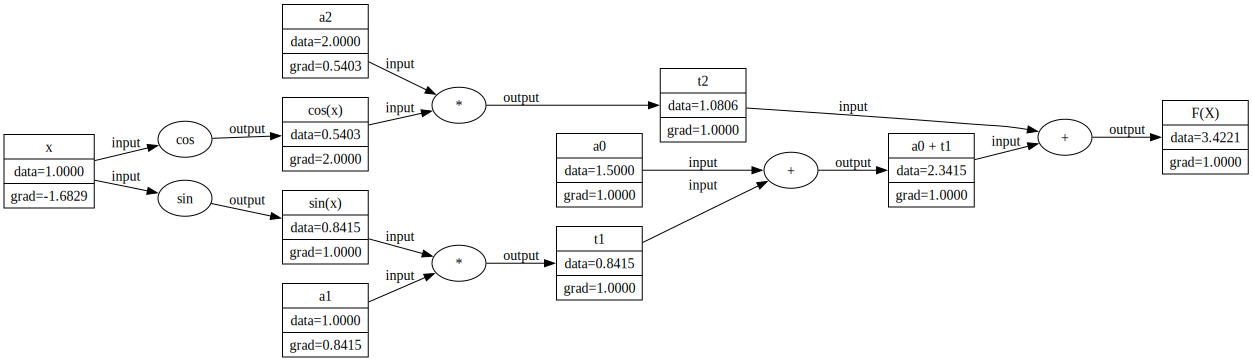

In [30]:
from utils.draw_graph import display_graph
display_graph(f_series)